### Importing modules

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
os.chdir(r'C:\Users\ARNAB NATH\Desktop\Python ML\Datasets')

### Loading datasets

In [2]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [3]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [4]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

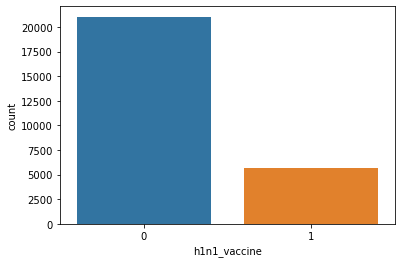

In [5]:
sns.countplot(data = df,x = 'h1n1_vaccine')
plt.show()

### Dropping columns which have too many null values

In [6]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
df.drop('unique_id',axis = 1,inplace = True)
df.drop('dr_recc_h1n1_vacc',axis = 1,inplace = True)
df.drop('dr_recc_seasonal_vacc',axis = 1,inplace = True)
df.drop('has_health_insur',axis = 1,inplace = True)
df.drop('qualification',axis = 1,inplace = True)
df.drop('income_level',axis = 1,inplace = True)
df.drop('marital_status',axis = 1,inplace = True)
df.drop('housing_status',axis = 1,inplace = True)
df.drop('employment',axis = 1,inplace = True)
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,2.0,55 - 64 Years,White,Female,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,2.0,4.0,35 - 44 Years,White,Male,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,1.0,2.0,18 - 34 Years,White,Male,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,5.0,4.0,1.0,65+ Years,White,Female,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,1.0,4.0,45 - 54 Years,White,Female,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,2.0,2.0,65+ Years,White,Female,Non-MSA,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,1.0,1.0,18 - 34 Years,White,Male,"MSA, Principle City",1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,5.0,4.0,2.0,55 - 64 Years,White,Female,"MSA, Not Principle City",0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,2.0,1.0,2.0,18 - 34 Years,Hispanic,Female,Non-MSA,1.0,0.0,0


In [8]:
df.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,25736.000000,...,25903.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.283261,...,0.111918,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.450591,...,0.315271,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


### Converting object type into numerical / floating point

In [9]:
df['age_bracket'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [10]:
df['race'].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [11]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df['census_msa'].unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [13]:
le = LabelEncoder()
df['age_bracket'] = le.fit_transform(df['age_bracket'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['census_msa'] = le.fit_transform(df['census_msa'])
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,2.0,3,3,0,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,2.0,4.0,1,3,1,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,1.0,2.0,0,3,1,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,5.0,4.0,1.0,4,3,0,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,1.0,4.0,2,3,0,0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,5.0,2.0,2.0,4,3,0,2,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,5.0,1.0,1.0,0,3,1,1,1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,5.0,4.0,2.0,3,3,0,0,0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,2.0,1.0,2.0,0,1,0,2,1.0,0.0,0


In [14]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                    int32
race                           int32
sex                            int32
census_msa                     int32
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

### Replacing the null values in object type entries with mode values

In [15]:
df['age_bracket'].replace(np.nan,df['age_bracket'].mode()[0],inplace = True)
df['race'].replace(np.nan,df['race'].mode()[0],inplace = True)
df['sex'].replace(np.nan,df['sex'].mode()[0],inplace = True)
df['census_msa'].replace(np.nan,df['census_msa'].mode()[0],inplace = True)

### Replacing the null values in remaining numerical / floating entries with median values

In [16]:
df.isnull().sum()

h1n1_worry                    92
h1n1_awareness               116
antiviral_medication          71
contact_avoidance            208
bought_face_mask              19
wash_hands_frequently         42
avoid_large_gatherings        87
reduced_outside_home_cont     82
avoid_touch_face             128
chronic_medic_condition      971
cont_child_undr_6_mnths      820
is_health_worker             804
is_h1n1_vacc_effective       391
is_h1n1_risky                388
sick_from_h1n1_vacc          395
is_seas_vacc_effective       462
is_seas_risky                514
sick_from_seas_vacc          537
age_bracket                    0
race                           0
sex                            0
census_msa                     0
no_of_adults                 249
no_of_children               249
h1n1_vaccine                   0
dtype: int64

In [17]:
for i in df.columns:
    df[i].replace(np.nan,df[i].median(),inplace = True)
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
race                         0
sex                          0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

### Checking correlation of dependent variables with other variables

In [18]:
corr = df.corr()
corr

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine
h1n1_worry,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,0.092249,...,0.231649,0.327986,0.222392,0.060573,-0.130248,-0.127503,0.004215,-0.016079,0.049441,0.121574
h1n1_awareness,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,-0.011653,...,0.085281,0.081156,-0.060241,-0.045029,0.150439,-0.067567,-0.060630,0.023866,0.053378,0.117771
antiviral_medication,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.004637,...,0.014498,0.081503,0.082177,-0.094191,-0.110963,-0.006196,0.012176,0.044829,0.083090,0.040226
contact_avoidance,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.042054,...,0.117356,0.127991,0.081887,0.003369,0.001699,-0.112591,-0.032665,0.017995,0.038977,0.046837
bought_face_mask,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.062200,...,0.040889,0.105917,0.087917,0.005206,-0.083075,-0.049912,-0.003851,0.014191,0.004794,0.070413
wash_hands_frequently,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.030205,...,0.136936,0.170655,0.087040,0.017109,-0.065468,-0.157033,-0.016584,0.009367,0.047451,0.074570
avoid_large_gatherings,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.099621,...,0.078208,0.130800,0.133398,0.093339,-0.108378,-0.055871,0.037169,-0.030994,-0.009126,0.018089
reduced_outside_home_cont,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.093675,...,0.066861,0.117428,0.135835,0.089049,-0.124640,-0.039100,0.028633,-0.026542,-0.008937,0.022080
avoid_touch_face,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.029966,...,0.104530,0.141537,0.089016,0.052805,-0.056717,-0.162693,0.004741,-0.001233,0.023739,0.070855
chronic_medic_condition,0.092249,-0.011653,0.004637,0.042054,0.062200,0.030205,0.099621,0.093675,0.029966,1.000000,...,0.093160,0.166381,0.052631,0.205219,0.006875,-0.049693,0.017954,-0.067277,-0.102541,0.094360


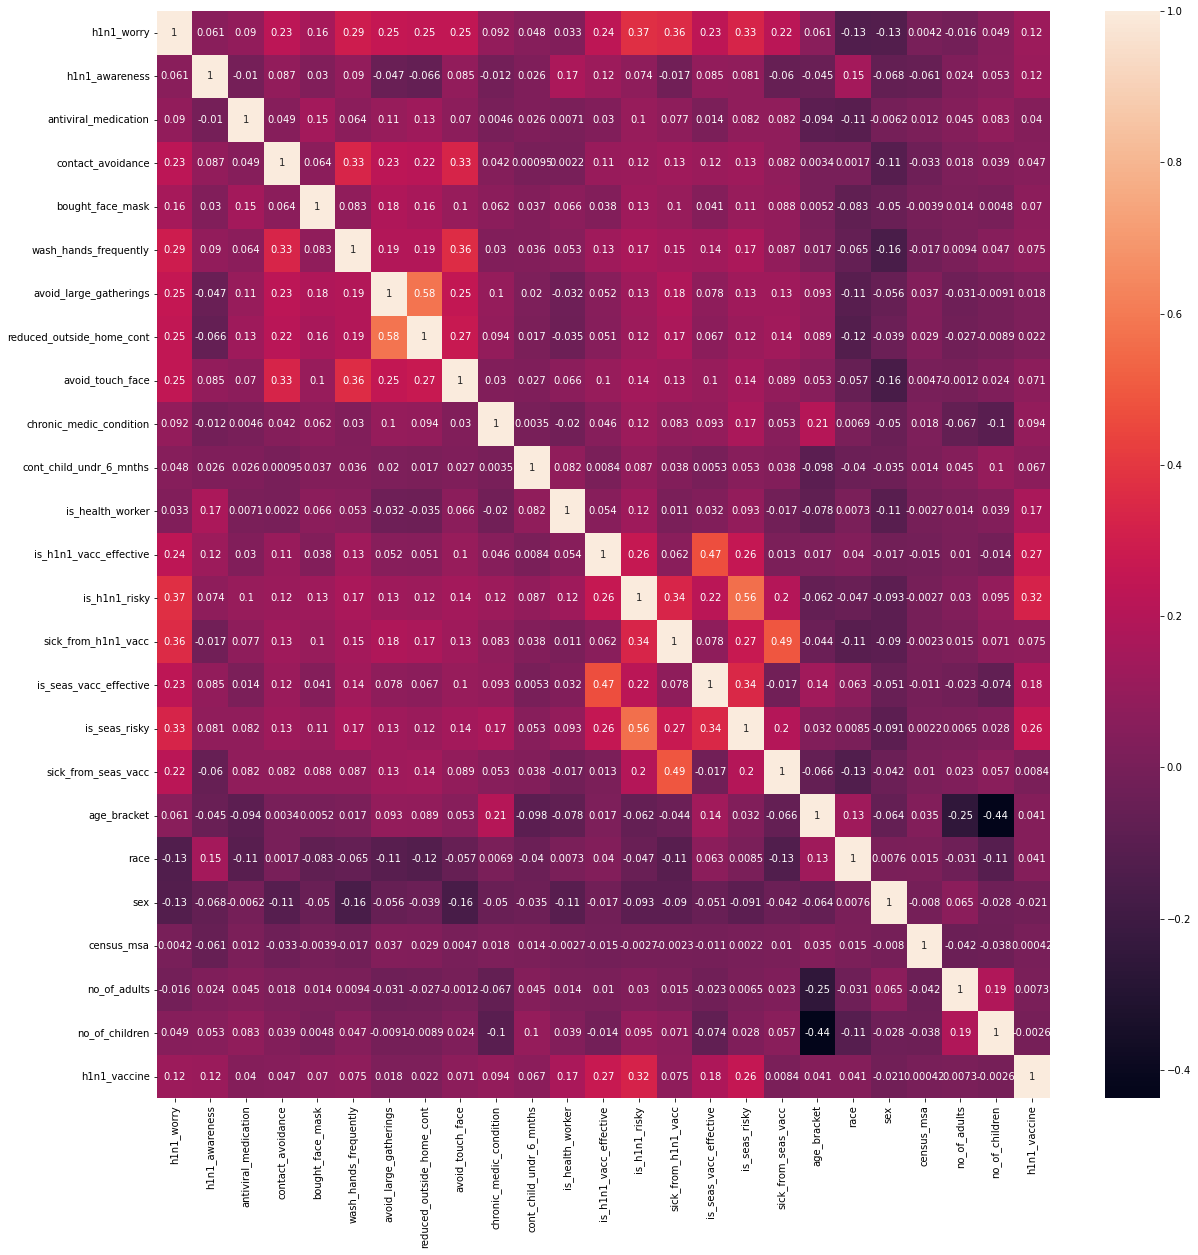

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot = True)
plt.show()

### Removing features which have low correlation with dependent variable h1n1_vaccine

In [20]:
cols = df.columns
for i in range(len(cols)):
    if abs(corr['h1n1_vaccine'][i]) < 0.05:
        df.drop(cols[i],axis = 1,inplace = True)
len(df.columns)

14

In [21]:
df

,h1n1_worry,h1n1_awareness,bought_face_mask,wash_hands_frequently,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,h1n1_vaccine
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,0
1,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,0
4,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,0
26703,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,0
26704,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,0
26705,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,0


In [22]:
df.describe()

,h1n1_worry,h1n1_awareness,bought_face_mask,wash_hands_frequently,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.068933,0.825888,0.678811,0.272962,0.080054,0.108548,3.852810,2.337589,2.352380,4.025536,2.705321,0.212454
std,0.909016,0.617047,0.253345,0.379213,0.466942,0.445490,0.271382,0.311077,1.000195,1.276825,1.353339,1.077131,1.375216,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [23]:
df.dtypes

h1n1_worry                 float64
h1n1_awareness             float64
bought_face_mask           float64
wash_hands_frequently      float64
avoid_touch_face           float64
chronic_medic_condition    float64
cont_child_undr_6_mnths    float64
is_health_worker           float64
is_h1n1_vacc_effective     float64
is_h1n1_risky              float64
sick_from_h1n1_vacc        float64
is_seas_vacc_effective     float64
is_seas_risky              float64
h1n1_vaccine                 int64
dtype: object

### Creating correlation matrix from remaining variables

In [24]:
corr = df.corr()
corr

,h1n1_worry,h1n1_awareness,bought_face_mask,wash_hands_frequently,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,h1n1_vaccine
h1n1_worry,1.000000,0.060828,0.155757,0.291670,0.245038,0.092249,0.048400,0.032734,0.235841,0.372716,0.355637,0.231649,0.327986,0.121574
h1n1_awareness,0.060828,1.000000,0.029888,0.089690,0.084633,-0.011653,0.025971,0.171516,0.119010,0.074394,-0.017038,0.085281,0.081156,0.117771
bought_face_mask,0.155757,0.029888,1.000000,0.083229,0.103603,0.062200,0.036828,0.065645,0.037679,0.128316,0.104655,0.040889,0.105917,0.070413
wash_hands_frequently,0.291670,0.089690,0.083229,1.000000,0.362979,0.030205,0.035749,0.052930,0.134815,0.167414,0.148739,0.136936,0.170655,0.074570
avoid_touch_face,0.245038,0.084633,0.103603,0.362979,1.000000,0.029966,0.026506,0.066284,0.101776,0.144442,0.130461,0.104530,0.141537,0.070855
chronic_medic_condition,0.092249,-0.011653,0.062200,0.030205,0.029966,1.000000,0.003533,-0.019810,0.046389,0.121849,0.082861,0.093160,0.166381,0.094360
cont_child_undr_6_mnths,0.048400,0.025971,0.036828,0.035749,0.026506,0.003533,1.000000,0.082023,0.008373,0.087016,0.038295,0.005304,0.053479,0.066712
is_health_worker,0.032734,0.171516,0.065645,0.052930,0.066284,-0.019810,0.082023,1.000000,0.054362,0.124095,0.010536,0.032069,0.092542,0.168056
is_h1n1_vacc_effective,0.235841,0.119010,0.037679,0.134815,0.101776,0.046389,0.008373,0.054362,1.000000,0.259813,0.061805,0.469367,0.256131,0.267352
is_h1n1_risky,0.372716,0.074394,0.128316,0.167414,0.144442,0.121849,0.087016,0.124095,0.259813,1.000000,0.335013,0.223904,0.562976,0.320580


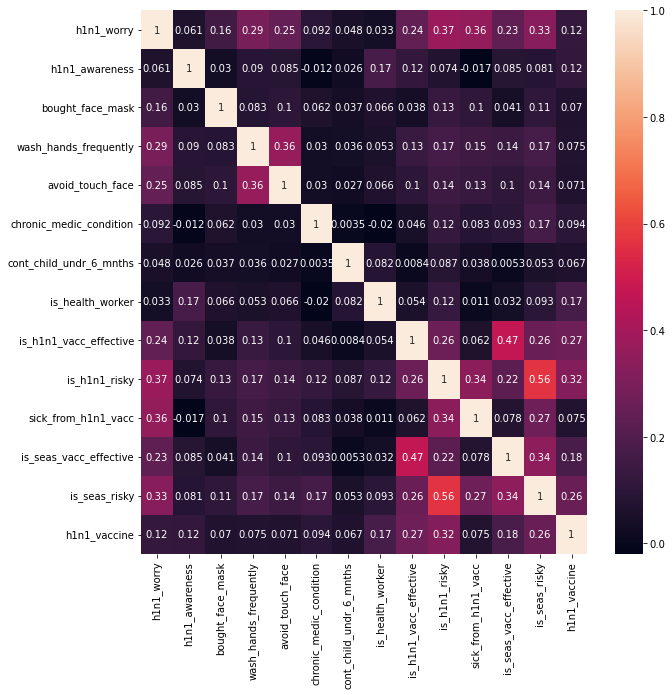

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True)
plt.show()

### Visualising relations between variable

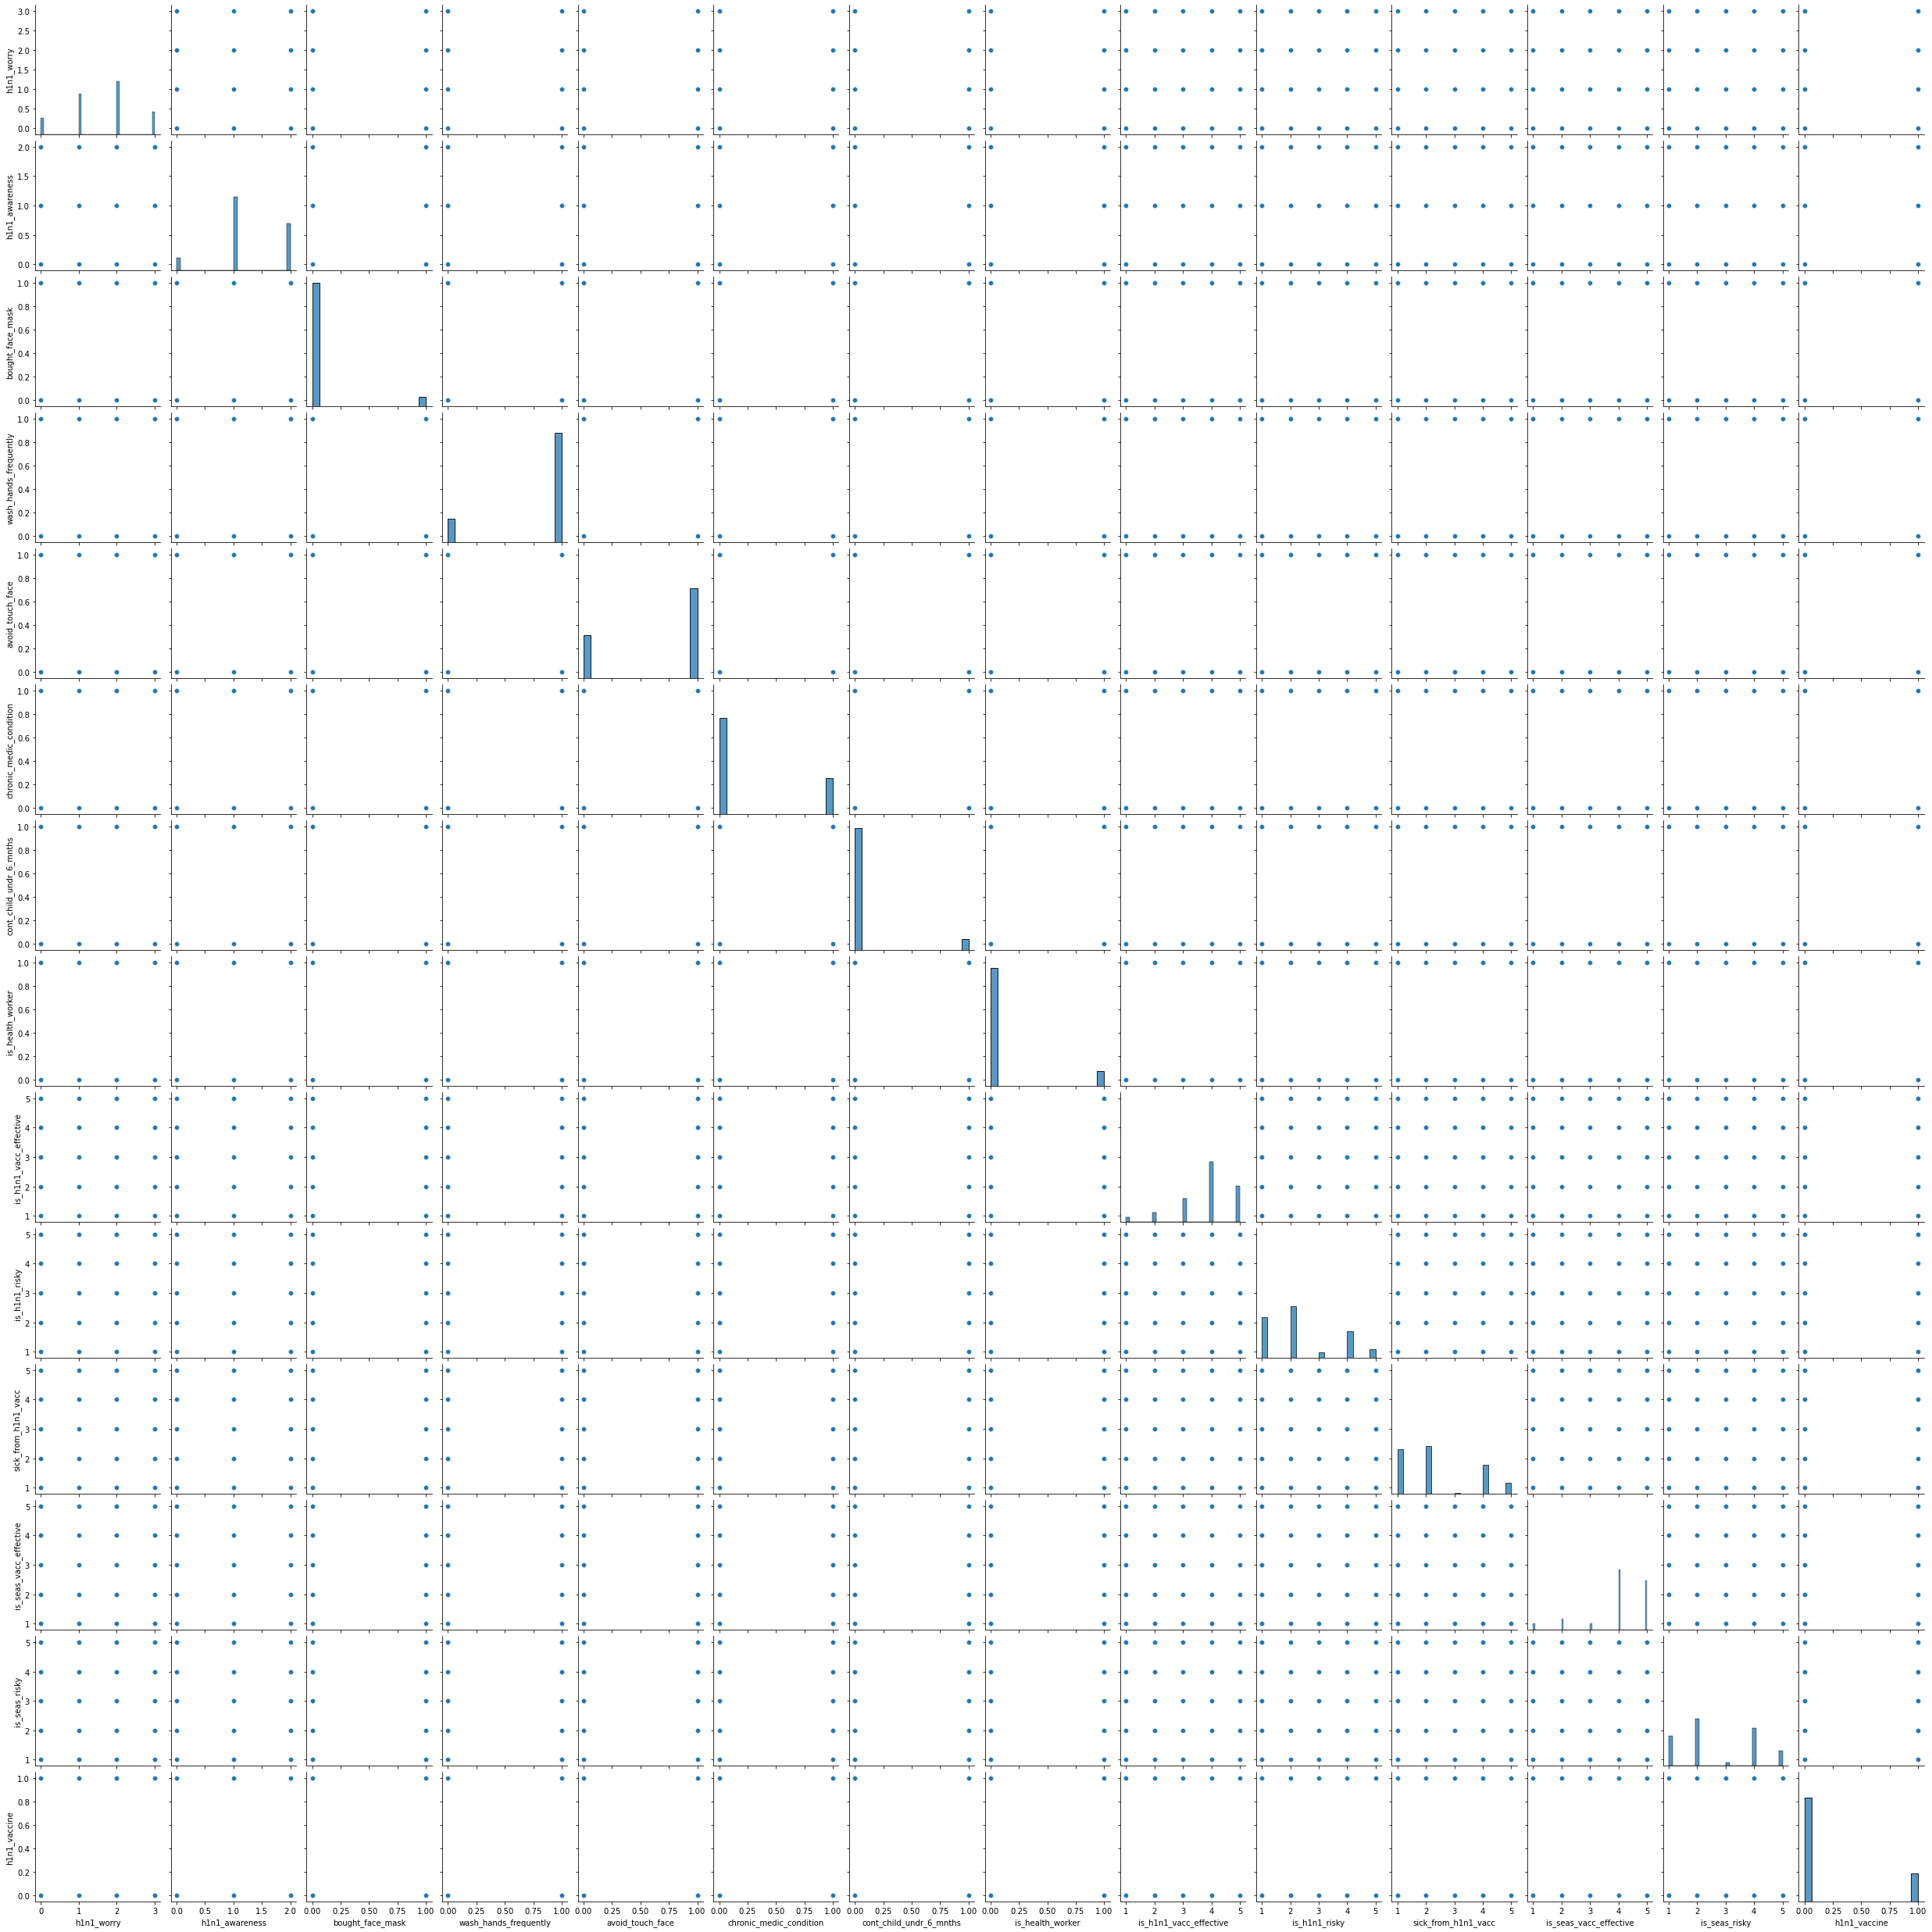

In [26]:
sns.pairplot(df)
plt.show()

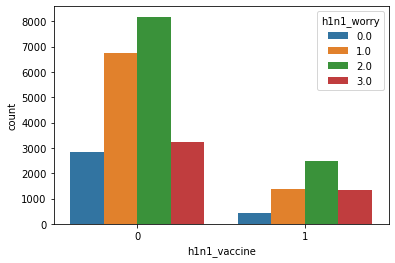

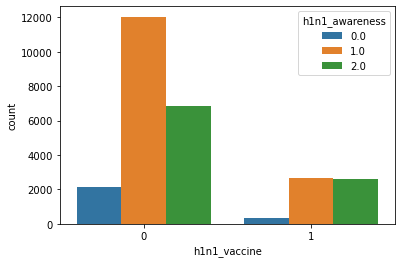

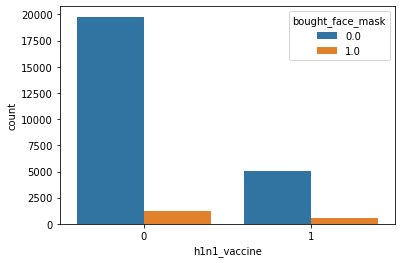

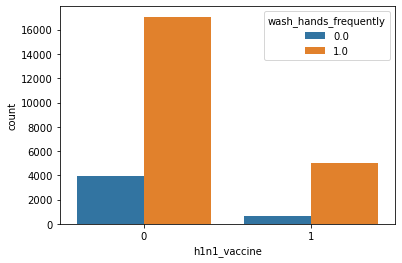

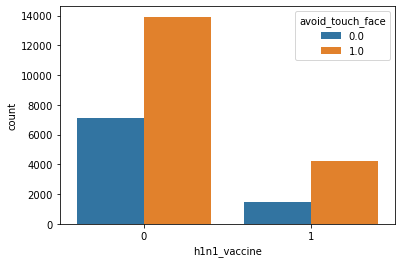

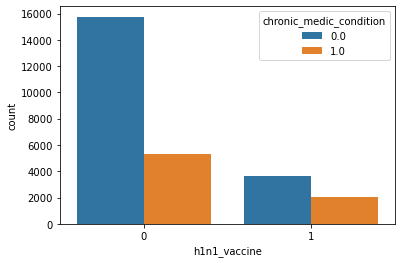

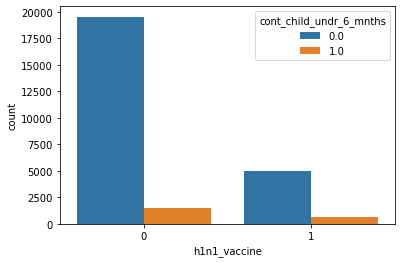

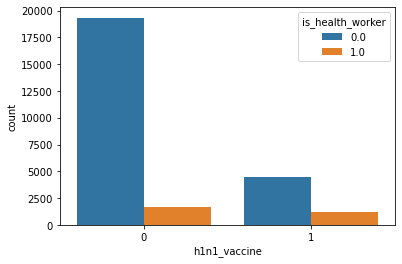

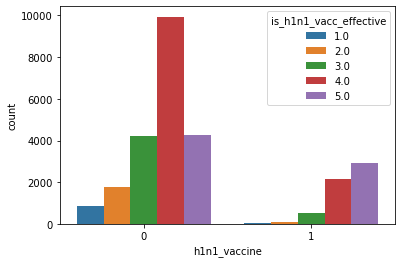

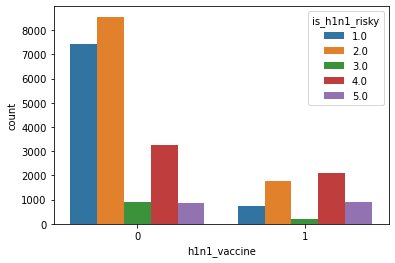

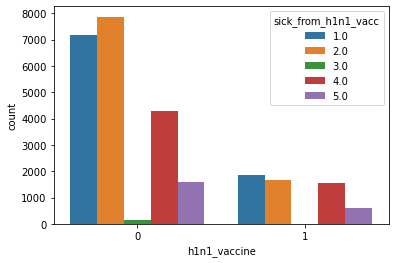

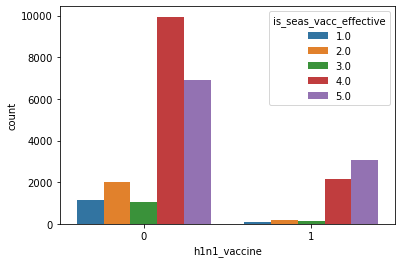

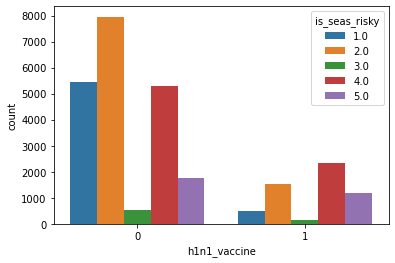

In [27]:
cols = df.columns
for i in cols[:-1]:
    sns.countplot(data = df,x = cols[-1],hue = i)
    plt.show()

### Creating models

In [28]:
x = df.drop('h1n1_vaccine',axis = 1)
y = df['h1n1_vaccine']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [30]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
lr.score(x_train,y_train)

0.8119822139012404

In [32]:
lr.score(x_test,y_test)

0.8202920254586298

In [33]:
dc = DecisionTreeClassifier(criterion='gini',max_depth=7)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [34]:
dc.score(x_train,y_train)

0.8176456821904985

In [35]:
dc.score(x_test,y_test)

0.8184200673904904

In [36]:
rc = RandomForestClassifier(criterion='gini',max_depth=8)
rc.fit(x_train,y_train)

RandomForestClassifier(max_depth=8)

In [37]:
rc.score(x_train,y_train)

0.8223730400187222

In [38]:
rc.score(x_test,y_test)

0.8240359415949082

In [39]:
ac = AdaBoostClassifier(base_estimator=dc,n_estimators=3)
ac.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                   n_estimators=3)

In [40]:
ac.score(x_train,y_train)

0.8228410952492394

In [41]:
ac.score(x_test,y_test)

0.8114938225383751

In [42]:
gc = GradientBoostingClassifier(n_estimators=50)
gc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50)

In [43]:
gc.score(x_train,y_train)

0.8145097121460332

In [44]:
gc.score(x_test,y_test)

0.8184200673904904

In [45]:
sv = SVC()
sv.fit(x_train,y_train)

SVC()

In [46]:
sv.score(x_train,y_train)

0.8123098525626024

In [47]:
sv.score(x_test,y_test)

0.8176712841632348